In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [7]:
data=pd.read_excel(r"Airlines.xlsx",sheet_name="data")

In [8]:
data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [4]:
data.shape

(3999, 12)

In [5]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# 4 Bussiness Models

In [6]:
data.mean()

ID#                   2014.819455
Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award?                   0.370343
dtype: float64

In [7]:
data.median()

ID#                   2016.0
Balance              43097.0
Qual_miles               0.0
cc1_miles                1.0
cc2_miles                1.0
cc3_miles                1.0
Bonus_miles           7171.0
Bonus_trans             12.0
Flight_miles_12mo        0.0
Flight_trans_12          0.0
Days_since_enroll     4096.0
Award?                   0.0
dtype: float64

In [8]:
data.var()

ID#                  1.347374e+06
Balance              1.015573e+10
Qual_miles           5.985557e+05
cc1_miles            1.895907e+00
cc2_miles            2.180060e-02
cc3_miles            3.811896e-02
Bonus_miles          5.832692e+08
Bonus_trans          9.223317e+01
Flight_miles_12mo    1.960586e+06
Flight_trans_12      1.438816e+01
Days_since_enroll    4.264781e+06
Award?               2.332473e-01
dtype: float64

In [9]:
data.std()

ID#                    1160.764358
Balance              100775.664958
Qual_miles              773.663804
cc1_miles                 1.376919
cc2_miles                 0.147650
cc3_miles                 0.195241
Bonus_miles           24150.967826
Bonus_trans               9.603810
Flight_miles_12mo      1400.209171
Flight_trans_12           3.793172
Days_since_enroll      2065.134540
Award?                    0.482957
dtype: float64

In [10]:
data.skew()

ID#                  -0.003343
Balance               5.004187
Qual_miles            7.512395
cc1_miles             0.857569
cc2_miles            11.210459
cc3_miles            17.195532
Bonus_miles           2.842093
Bonus_trans           1.157362
Flight_miles_12mo     7.451666
Flight_trans_12       5.490461
Days_since_enroll     0.120174
Award?                0.537200
dtype: float64

In [11]:
data.kurt()

ID#                   -1.199648
Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award?                -1.712272
dtype: float64

# PreProcessing of the Data

In [12]:
data.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [15]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [16]:
data.shape

(3999, 12)

In [17]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


Model Creation

In [9]:
#Normalization of the Data
def norm_df(i):
    x = (i-i.min())/(i.min()-i.max())
    return(x)

In [10]:
normal_data=norm_df(data)
normal_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.000000,-0.016508,-0.0,-0.00,-0.0,-0.0,-0.000660,-0.011628,-0.000000,-0.000000,-0.843742,-0.0
1,-0.000249,-0.011288,-0.0,-0.00,-0.0,-0.0,-0.000815,-0.023256,-0.000000,-0.000000,-0.839884,-0.0
2,-0.000498,-0.024257,-0.0,-0.00,-0.0,-0.0,-0.015636,-0.046512,-0.000000,-0.000000,-0.847842,-0.0
3,-0.000746,-0.008667,-0.0,-0.00,-0.0,-0.0,-0.001896,-0.011628,-0.000000,-0.000000,-0.837955,-0.0
4,-0.000995,-0.057338,-0.0,-0.75,-0.0,-0.0,-0.164211,-0.302326,-0.067398,-0.075472,-0.835905,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.999005,-0.010837,-0.0,-0.00,-0.0,-0.0,-0.032330,-0.046512,-0.006490,-0.018868,-0.168917,-1.0
3995,-0.999254,-0.037766,-0.0,-0.00,-0.0,-0.0,-0.003720,-0.058140,-0.000000,-0.000000,-0.167953,-1.0
3996,-0.999502,-0.043169,-0.0,-0.50,-0.0,-0.0,-0.096505,-0.093023,-0.000000,-0.000000,-0.168797,-1.0
3997,-0.999751,-0.032202,-0.0,-0.00,-0.0,-0.0,-0.001896,-0.011628,-0.016225,-0.018868,-0.168676,-0.0


In [11]:
from sklearn.cluster import KMeans

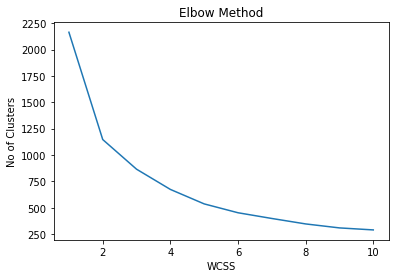

In [12]:
wcss=[]
for k in range(1,11):
    clf=KMeans(n_clusters=k)
    clf.fit(normal_data)
    wcss.append(clf.inertia_)
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("WCSS")
plt.ylabel("No of Clusters")
plt.show()

In [ ]:
Here we Assume that k-value is to  be 5

In [13]:
model1=KMeans(n_clusters=5)
model1.fit(normal_data)
model1.labels_

array([4, 4, 4, ..., 1, 2, 2])

In [14]:
model1.labels_.shape

(3999,)

In [27]:
normal_data['Clusters']=model1.labels_
data['Clusters']=model1.labels_

In [16]:
normal_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,-0.000000,-0.016508,-0.0,-0.00,-0.0,-0.0,-0.000660,-0.011628,-0.000000,-0.000000,-0.843742,-0.0,4
1,-0.000249,-0.011288,-0.0,-0.00,-0.0,-0.0,-0.000815,-0.023256,-0.000000,-0.000000,-0.839884,-0.0,4
2,-0.000498,-0.024257,-0.0,-0.00,-0.0,-0.0,-0.015636,-0.046512,-0.000000,-0.000000,-0.847842,-0.0,4
3,-0.000746,-0.008667,-0.0,-0.00,-0.0,-0.0,-0.001896,-0.011628,-0.000000,-0.000000,-0.837955,-0.0,4
4,-0.000995,-0.057338,-0.0,-0.75,-0.0,-0.0,-0.164211,-0.302326,-0.067398,-0.075472,-0.835905,-1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.999005,-0.010837,-0.0,-0.00,-0.0,-0.0,-0.032330,-0.046512,-0.006490,-0.018868,-0.168917,-1.0,1
3995,-0.999254,-0.037766,-0.0,-0.00,-0.0,-0.0,-0.003720,-0.058140,-0.000000,-0.000000,-0.167953,-1.0,1
3996,-0.999502,-0.043169,-0.0,-0.50,-0.0,-0.0,-0.096505,-0.093023,-0.000000,-0.000000,-0.168797,-1.0,1
3997,-0.999751,-0.032202,-0.0,-0.00,-0.0,-0.0,-0.001896,-0.011628,-0.016225,-0.018868,-0.168676,-0.0,2


In [21]:
model1.inertia_

536.2085069194483

In [18]:
model1.cluster_centers_

array([[-4.04765766e-01, -7.38484569e-02, -6.18416471e-03,
        -6.66206262e-01, -9.20810313e-04, -6.44567219e-03,
        -1.25283911e-01, -2.01593216e-01, -7.32518842e-03,
        -1.23701310e-02, -5.77744412e-01,  4.44089210e-16],
       [-5.12970635e-01, -4.57321138e-02, -2.45952260e-02,
        -1.06780735e-01, -1.39416984e-02, -1.90114068e-03,
        -4.04177047e-02, -1.31812421e-01, -3.00549715e-02,
        -5.30406294e-02, -4.91011414e-01, -1.00000000e+00],
       [-8.00207185e-01, -2.08090406e-02, -8.47149727e-03,
        -5.14375562e-02, -8.53548967e-03, -1.57232704e-03,
        -1.67102887e-02, -8.07998496e-02, -6.94107035e-03,
        -1.12732882e-02, -2.39360618e-01, -4.77395901e-15],
       [-3.43913381e-01, -6.96932940e-02, -1.80696763e-02,
        -7.67341040e-01, -7.22543353e-04, -7.58670520e-03,
        -1.88524767e-01, -2.42472106e-01, -2.52836950e-02,
        -4.44977642e-02, -6.33091022e-01, -1.00000000e+00],
       [-2.90207893e-01, -2.90886318e-02, -8.1206496

In [32]:
data.groupby('Clusters').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters,,,,,,,,,,,,
0,1628.158379,125899.655617,68.941068,3.664825,1.001842,1.025783,33035.488029,17.337017,225.740331,0.655617,4793.812155,0.0
1,2063.888748,77932.570164,274.758534,1.431100,1.027813,1.007585,10696.232617,11.361568,925.252845,2.807838,4072.941846,1.0
2,3217.832884,35476.043127,94.440252,1.205750,1.017071,1.006289,4406.252471,6.948787,213.902965,0.597484,1987.256963,0.0
3,1380.705797,118972.327536,200.575362,4.072464,1.001449,1.030435,49779.998551,20.850725,779.831884,2.360870,5258.000000,1.0
4,1167.635731,49591.404872,90.529002,1.116009,1.017401,1.001160,3376.904872,6.814385,242.636891,0.721578,5574.878190,0.0
